In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np



In [2]:
df=pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
df.replace({"Yes":1,"No":0},inplace=True)

C:\Users\ansar\AppData\Local\Temp\ipykernel_27024\981542203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes":1,"No":0},inplace=True)


#  In Machine Learning (ML), heatmaps are commonly used for correlation matrices, feature importance visualization, and confusion matrices.

# 1. Heatmaps in ML Use Cases
# a) Correlation Matrix Heatmap
# Displays the correlation between different features in a dataset.
# Helps identify multicollinearity.
# Values range from -1 to 1:
# -1 → Strong negative correlation.
# 0 → No correlation.
# 1 → Strong positive correlation.

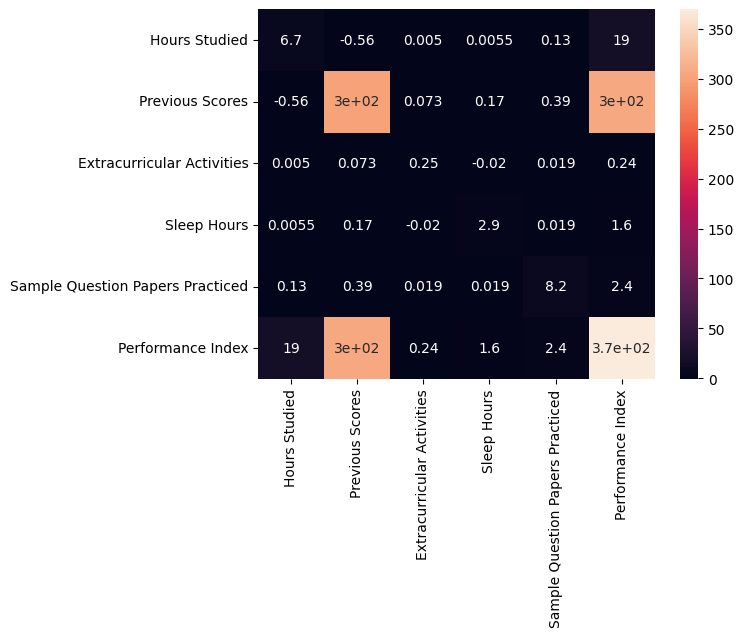

In [10]:
sns.heatmap(data=df.cov(),annot=True)
plt.show()

In [14]:
x=df.iloc[:,:-1]
y=df["Performance Index"]

In [16]:
from  sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape  , y_train.shape

((8000, 5), (8000,))

In [22]:
x_test.shape  , y_test.shape

((2000, 5), (2000,))

# scaled values using Standard Scaler 

In [23]:
sc=StandardScaler()

In [25]:
sc.fit(x_train)

StandardScaler()

In [26]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.777257,1.699221,1.010808,1.447477,-1.264041
1,-0.378946,0.718979,-0.989307,-1.496494,-0.914520
2,1.162658,-1.068522,1.010808,0.269888,-0.914520
3,0.006455,-1.010860,1.010808,-0.907700,-0.914520
4,0.777257,0.315350,-0.989307,0.858683,0.134041
...,...,...,...,...,...
9995,-1.535148,-1.183844,1.010808,-1.496494,-0.914520
9996,0.777257,-0.318925,1.010808,0.858683,0.134041
9997,0.391856,0.776640,1.010808,0.858683,0.134041
9998,1.548059,1.583899,1.010808,0.269888,-1.613561


In [52]:
from  sklearn.linear_model import LinearRegression , Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error # to chech errro diff


# LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

# to check accuracy we use score method

In [30]:
lr.score(x_test,y_test)

0.9889832909573145

In [31]:
lr.score(x_test,y_test)*100

98.89832909573146

In [ ]:
# to check erro diff use below mse ,msa

In [54]:
print("error margin in MSE in linear Reg",mean_squared_error(y_test,lr.predict(x_test)))
print("error margin in MAE in linear Reg",mean_absolute_error(y_test,lr.predict(x_test)))
print("error margin in RMSE in linear Reg",np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

error margin in MSE in linear Reg 4.082628398521853
error margin in MAE in linear Reg 1.6111213463123044
error margin in RMSE in linear Reg 2.0205515085050054


# 99% percent accuray train model well 

In [32]:
lr.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

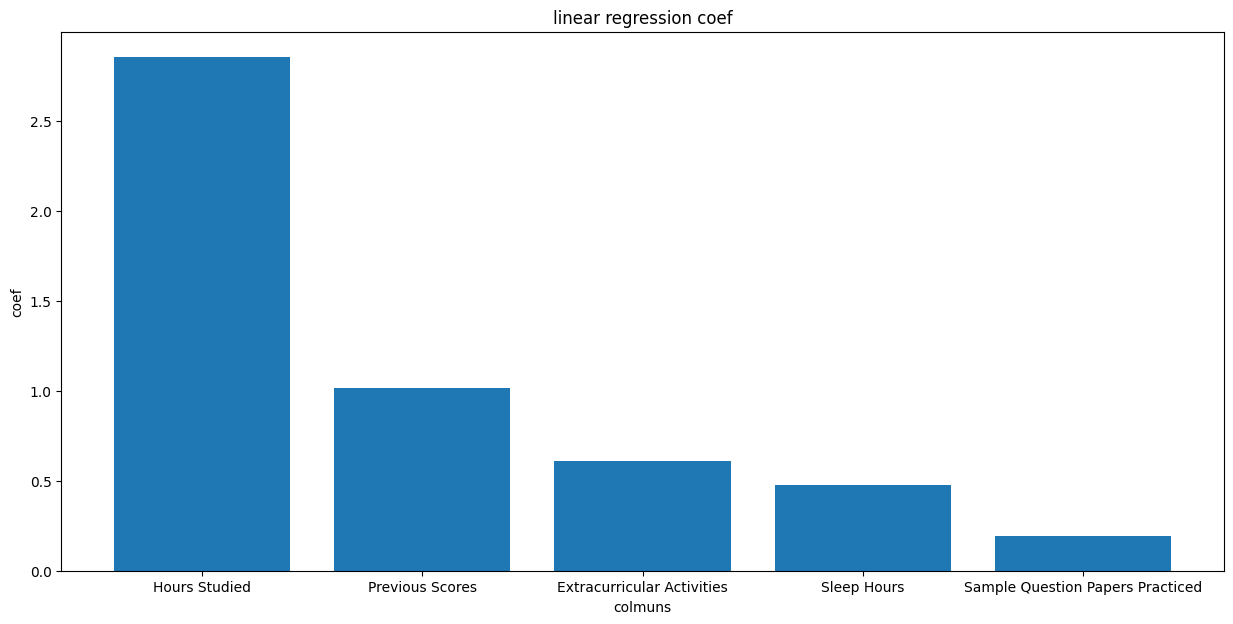

In [44]:
plt.figure(figsize=(15,7))
plt.bar(x.columns,lr.coef_)
plt.title("linear regression coef")
plt.xlabel("colmuns")
plt.ylabel("coef")
plt.show()

# Lasso it is used to feature selection called L1 regularization tech

In [48]:
la=Lasso(alpha=10) # alpha ==> panality coefficient 
la.fit(x_train,y_train)
la.score(x_test,y_test)*100 # to check accuracy  of lasso tech(L1)

94.53715976912892

 # alpha ==> panality coefficient it may vary acco. to project 

In [55]:
print("error margin in MSE in Lasso Reg",mean_squared_error(y_test,la.predict(x_test)))
print("error margin in MAE in Lasso Reg",mean_absolute_error(y_test,la.predict(x_test)))
print("error margin in RMSE in Lasso Reg",np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

error margin in MSE in Lasso Reg 20.244472806468277
error margin in MAE in Lasso Reg 3.7201561629714806
error margin in RMSE in Lasso Reg 4.499385825473103


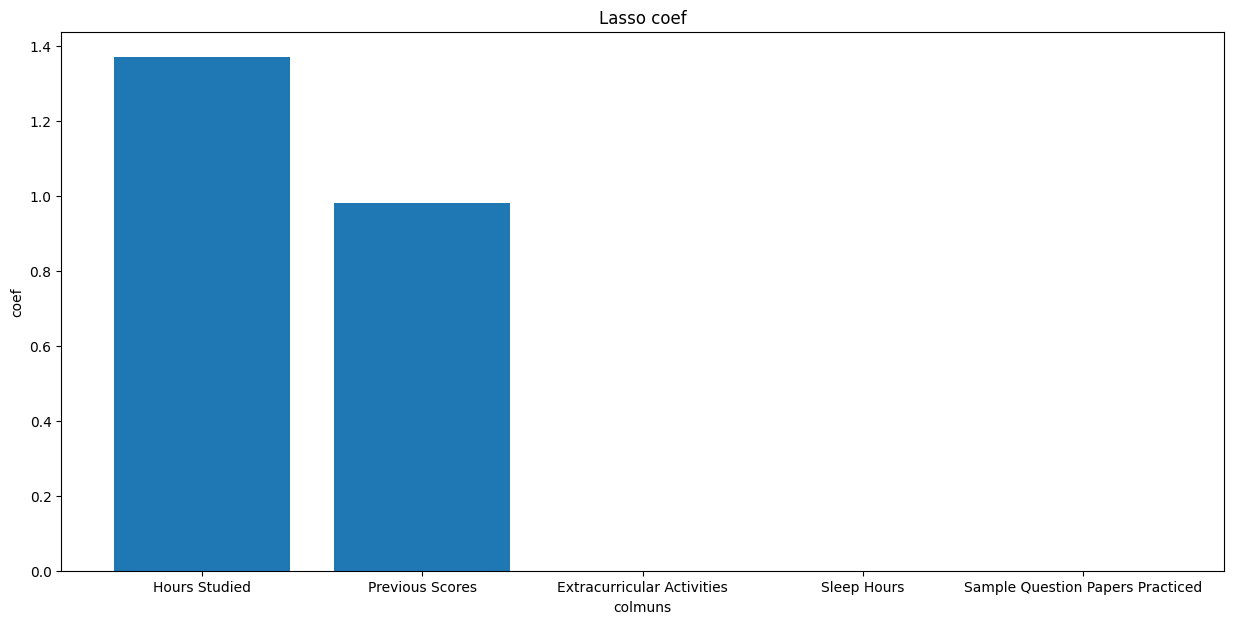

In [49]:
plt.figure(figsize=(15,7))
plt.bar(x.columns,la.coef_)
plt.title("Lasso coef")
plt.xlabel("colmuns")
plt.ylabel("coef")
plt.show()

# ridge  it is used to feature selection called L2 regularization tech having almost near to zero not exactly zero 

In [50]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100 #  to  check accuracy of ridge model

98.89830167755889

In [56]:
print("error margin in MSE in Ridge Reg",mean_squared_error(y_test,ri.predict(x_test)))
print("error margin in MAE in Ridge Reg",mean_absolute_error(y_test,ri.predict(x_test)))
print("error margin in RMSE in Ridge Reg",np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

error margin in MSE in Ridge Reg 4.082730006188447
error margin in MAE in Ridge Reg 1.6111137606854977
error margin in RMSE in Ridge Reg 2.020576651896296


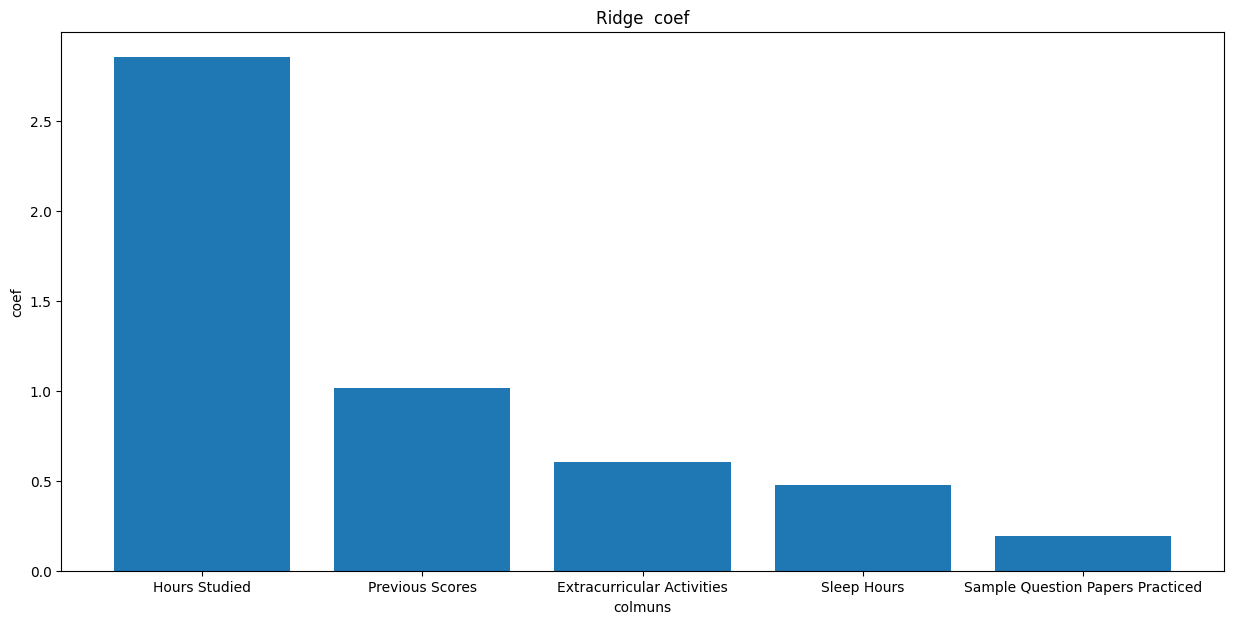

In [51]:
plt.figure(figsize=(15,7))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge  coef")
plt.xlabel("colmuns")
plt.ylabel("coef")
plt.show()

# comparison of Linear,Ridge,Lasso

In [57]:
df1=pd.DataFrame({"Col_name":x.columns,"Linear Reg":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df1

,Col_name,Linear Reg,Lasso,Ridge
0,Hours Studied,2.852484,1.370226,2.851957
1,Previous Scores,1.016988,0.981705,1.016983
2,Extracurricular Activities,0.608617,0.000000,0.605583
3,Sleep Hours,0.476941,0.000000,0.476723
4,Sample Question Papers Practiced,0.191831,0.000000,0.191809
